In [1]:
import torch
# data
# pytorch는 데이터 준비를 위해 torch.utils.data의 Dataset, DataLoader 사용 가능
# Dataset에는 다양한 dataset 존재.
## vistion, text, audio, etc..
# DataLoader 와 Dataset을 통해 batch_size, train 여부, transform 등을 인자로 넣어 데이터를 어떻게 Load
# 할 것인지 정해줄 수 있음.

from torch.utils.data import Dataset, DataLoader

In [2]:
# torchvision은 pytorch에서 제공하는 데이터셋들이 모여있는 package
# transforms : 전처리 할 때 사용하는 메소드
# transforms에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 단계를 진행

import torchvision.transforms as transforms
from torchvision import datasets

In [3]:
# DataLoader의 인자로 들어갈 transform을 미리 정의할 수 있고, Compose를 통해 리스트 안에 순서대로 전처리 진행
# ToTensor()를 하는 이유는 torchvision이 PIL Image 형태로만 입력을 받기 때문에
# 데이터 처리를 위해서 Tensor형으로 변환 필요.

mnist_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize(mean=(0.5,), std=(1.0,))])
# mnist dataset에 대해서 transform 해주는 과정을 위와 같이 미리 정의 가능하다.

In [4]:
# DataLoader는 데이터 전체를 보관했다가 실제 모델 학습할 때, batch_size 크기만큼 데이터를 가져온다.

# root는 어디에 저장할지. train은 True, False이면 test set, download = True 다운 가능.
# transform은 만들어 둔 것 사용.
trainset = datasets.MNIST(root='/content/',
                         train=True, download = True,
                         transform=mnist_transform)


testset = datasets.MNIST(root='/content/',
                         train=False, download = True,
                         transform=mnist_transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [5]:
# DataLoader는 데이터 전체를 보관했다가 실제 모델 학습을 할 때 batch_size 크기만큼만 데이터를 가져옴.

# batch는 8개씩 가져오도록 지정, shuffle은 data를 뒤섞음, worker가 paraell하게 동작하도록.
train_loader = DataLoader(trainset, batch_size=8, shuffle = True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle = False, num_workers=2)

In [6]:
# data를 dataLoader를 통해, iteration을 통해 가져온다.
dataiter = iter(train_loader)
images, labels = next(dataiter) # 한 번만 취함 // next는 왼쪽 코드와 같이 바뀜.
images.shape, labels.shape
# 아래 두 번째 index의 1은 흑백을 의미. 28 x 28 짜리 Image인데, 흑백이며 8개가 존재.
# batch_size가 8이므로 8개 가져옴.

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [7]:
torch_image = torch.squeeze(images[0])
torch_image.shape

# squeeze로 차원을 축소 시킴.
# 1, 28, 28을 하나만 가지고 와서 맨 앞의 1을 버리고 shape에는 28 x 28이 나옴.

torch.Size([28, 28])

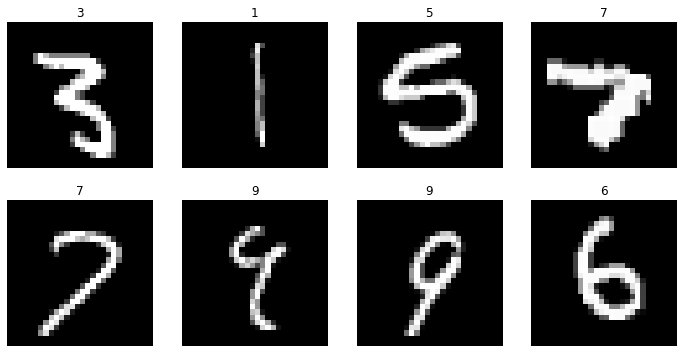

In [8]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12,6)) # size 대략 잡음
cols, rows = 4, 2 # 8개 이므로
for i in range(1, cols * rows + 1): # 8개 만큼 반복
  sample_idx = torch.randint(len(trainset), size=(1, )).item()
  # sample_idx에 trainset의 전체 길이 넣주고, 이 길이 만큼 사이즈 기준으로 random 값 가져오는 값의 실제값을 인덱스로 사용함.
  img, label = trainset[sample_idx]
  # img, label에 trainset에서 실제 인덱스 값 하나 가져옴.
  figure.add_subplot(rows, cols, i)
  # subplot으로 rows와 cols에 i번째에 add 해줌.
  plt.title(label)
  # 그 위에 title로 label 띄움
  plt.axis('off')
  # 축 없앰
  plt.imshow(img.squeeze(), cmap='gray')
plt.show()